In [13]:
# importing the relevant modules
import pandas as pd
import matplotlib.pyplot as mplpy
import numpy as np

## Climate Change: the Highs and Lows, not Global Warming

**Objective**: <font color='green'>Students should define the project's goal or main question</font>.

The goal of this project is to simply show that Earth has been getting warmer, and fast.  While not difficult to show or something that's a revelation, I feel like it's best to be harped upon as this is a problem that is global in scale.

**Data Source**: <font color='green'>Describe where the data comes from and how it might answer the question</font>.

I gathered this data from Kaggle.  More specifically, from the dataset '[Climate change indicators](https://www.kaggle.com/datasets/tarunrm09/climate-change-indicators?select=climate_change_indicators.csv)'. It's a fairly simplistic dataset and has 60+ years of data from countries all around the world, as well as an average of Earth's collective temperature.

**Load Data**: <font color='green'>Use Pandas to load a dataset (CSV, Excel, or database)</font>.

In [14]:
# loading the dataset and applying it to the variable df
df = pd.read_csv('climate_change_indicators.csv')

**Initial Check**: <font color='green'>Display the first few rows and basic information about the dataset, noting column names, types, and missing values</font>.

In [15]:
# displaying the heading(s) and the first five rows
df.head(5)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


**Selection Options**:

The following table is entirely topical and we'll be using one major row: the World, focusing on change from 1962 until 2022.  Columns 'ISO3' and the 'CTS_*' will be omitted as they contribute redundancy, as will all states because - realistically - we want a general grasp of warming and change around the globe.

We will be keeping the index numbers, identifiers both abbreviated (ISO2) and specfic country names, as well as the all of the years: 1962-2022.

In [16]:
# creating a 'year_columns' variable for brevity's sake
year_columns = [f'F{year}' for year in range(1962, 2023)]

# keeping certain columns, especially years 1962-2022 (2023, see above)
columns_to_keep = ['Country', 'ISO2'] + year_columns
df_filtered = df[columns_to_keep]

**Handle Missing Values**: <font color='green'>Choose how to handle missing values (drop, fill, or leave as is)</font>.

Data will be left as is.  If we truly wanted to ballpark temperatures for a certain location like Yemen which is missing a considerable amount of data, we could take averages from the surrounding countries (Saudi Arabia and Oman) and then apply an average of those.

**Data Type Adjustments**: <font color='green'>Convert columns to appropriate types (e.g., dates to datetime)</font>.

There are no columns that need to be converted.  Data is rudimentary and well-kept.

**Feature Engineering**: <font color='green'>Create at least one new feature from existing data.</font>

A simple transformation between Celsius and Fahrenheit would suffice here, translating this into something much easier to digest in America and, in doing so, is relevant to our graph.

In [17]:
# creating a copy and applying part of the Farenheit formula, rounded
df_CtoF = df_filtered.copy()
df_CtoF[year_columns] = (df_filtered[year_columns] * 1.8).round(2)

df_CtoF.head(5)

,Country,ISO2,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",AF,-0.30,1.52,-1.38,-0.44,0.41,-0.67,-0.76,-0.97,...,2.31,0.82,1.97,2.80,2.77,2.78,1.64,0.90,2.39,3.62
1,Albania,AL,0.59,0.14,-0.30,-0.70,1.01,-0.13,0.15,-0.02,...,2.40,2.16,2.82,2.64,2.02,3.65,3.02,2.70,2.76,2.73
2,Algeria,DZ,0.21,0.14,0.45,-0.18,0.78,-0.05,-0.12,0.52,...,2.15,3.04,2.02,3.16,2.72,2.18,2.01,3.47,4.19,3.04
3,American Samoa,AS,-0.08,0.30,-0.25,-1.01,0.33,-0.66,-0.34,0.24,...,2.26,2.11,1.82,2.77,2.58,2.14,2.77,2.57,2.28,2.26
4,"Andorra, Principality of",AD,0.20,-1.35,0.55,-0.88,0.75,1.15,0.03,-0.25,...,1.50,3.50,3.04,3.58,3.47,3.45,3.54,4.61,2.76,5.84


**Descriptive Statistics**:
<font color='green'>Provide summary statistics (mean, median, min, max) for numerical columns.</font>

In [18]:
# using the describe function
summary = df_CtoF.describe()

# rounding to clean up
summary_round = summary.round(2)

# display
print(summary_round)

        F1962   F1963   F1964   F1965   F1966   F1967   F1968   F1969   F1970  \
count  189.00  188.00  188.00  188.00  192.00  191.00  191.00  190.00  189.00   
mean    -0.02   -0.01   -0.13   -0.44    0.19   -0.20   -0.36    0.28    0.17   
std      0.62    0.70    0.56    0.49    0.68    0.61    0.49    0.56    0.63   
min     -1.63   -2.29   -1.58   -1.92   -3.24   -1.89   -2.94   -1.62   -2.32   
25%     -0.30   -0.37   -0.42   -0.71   -0.06   -0.46   -0.61   -0.02   -0.10   
50%     -0.10   -0.00   -0.10   -0.42    0.18   -0.26   -0.34    0.37    0.23   
75%      0.21    0.41    0.24   -0.17    0.50    0.02   -0.12    0.63    0.54   
max      1.80    2.16    1.97    1.54    2.07    2.04    0.86    1.69    1.76   

        F1971  ...   F2013   F2014   F2015   F2016   F2017   F2018   F2019  \
count  191.00  ...  216.00  216.00  216.00  213.00  214.00  213.00  213.00   
mean    -0.36  ...    1.68    2.01    2.29    2.59    2.31    2.34    2.60   
std      0.42  ...    0.58    1.02  


**Data Visualizations**: <font color='green'>Required: One visualization (e.g., line plot) if time-series data is relevant.</font>

<font color='green'>Optional: Additional visuals like bar charts for comparisons, histograms for distributions, or scatter plots for relationships.</font>

The Earth is warming at an alarming rate, and has been for a long time.  The following graphic, a line chart show just how fast we've gone from the fluctuations of a normal climate to well above average temperatures.

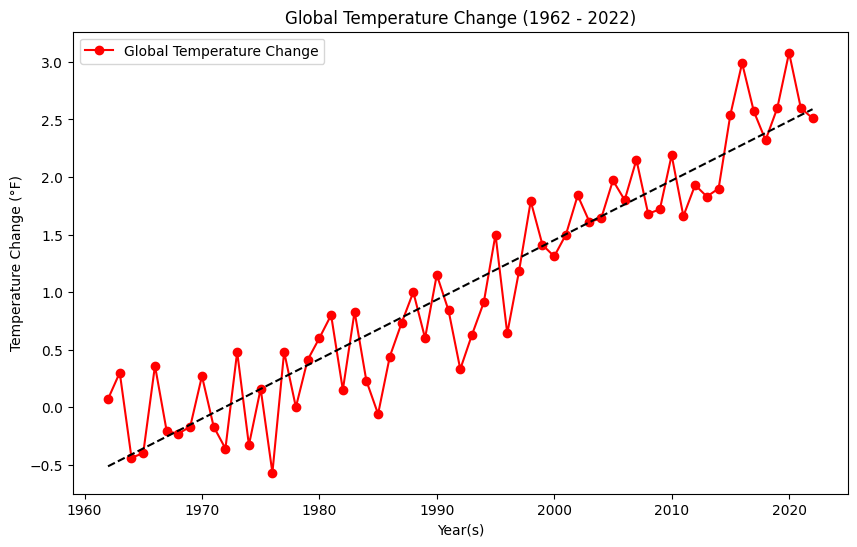

In [21]:
# first we extract the specific row to show the 'world' alone, using our fahrenheit converted df
world = df_CtoF[df_CtoF['Country'] == 'World']

# next we 'flatten' the values into numeric ones
world_temps = world[year_columns].values.flatten()

# creating a list of years for the data
years = list(range(1962, 2023))

# creating a trend line and function for a more concise look at how we're trending upward
world_trend = np.polyfit(years, world_temps, 1)
world_trend_line = np.poly1d(world_trend)

# finally, we plot the data
mplpy.figure(figsize=(10, 6))
mplpy.plot(years, world_temps, marker='o', color='red', label='Global Temperature Change')
mplpy.plot(years, world_trend_line(years), color='black', linestyle='--')
mplpy.title('Global Temperature Change (1962 - 2022)')
mplpy.xlabel('Year(s)')
mplpy.ylabel('Temperature Change (°F)')
mplpy.grid(False)
mplpy.legend()
mplpy.show()

We can also derive from disparate countries in opposite climates of the world that this isn't some local, nuanced problem.  While not necessarily scientific, this does show that while the world's aggregate temperature is rising, it boils it down to a more personal, state-level.  Greenland and Niger could not be more different, and yet, if you follow the trends below, you'll see they they're quite similar in how they're trending upward.

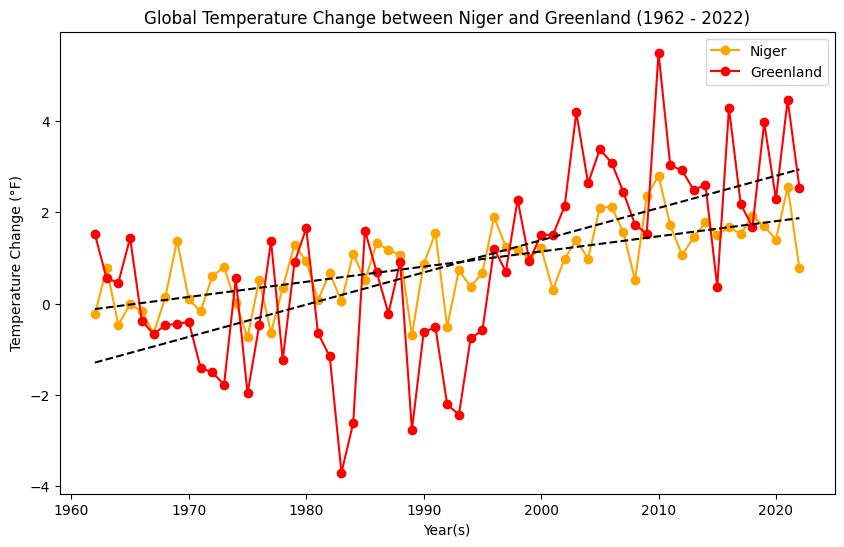

In [24]:
# following a similar trend to above, we'll take 'Niger' and 'Greenland' and assign them to variables
niger = df_CtoF[df_CtoF['Country'] == 'Niger']
greenland = df_CtoF[df_CtoF['Country'] == 'Greenland']

# then flatten them (habit, despite not needing to)
niger_temps = niger[year_columns].values.flatten()
greenland_temps = greenland[year_columns].values.flatten()

# adding two sets of trend lines
niger_trend = np.polyfit(years, niger_temps, 1)
niger_trend_line = np.poly1d(niger_trend)
greenland_trend = np.polyfit(years, greenland_temps, 1)
greenland_trend_line = np.poly1d(greenland_trend)

# and using the same graph, we can plot both of them while also adding a trend line
mplpy.figure(figsize=(10, 6))
mplpy.plot(years, niger_temps, marker='o', color='orange', label='Niger')
mplpy.plot(years, greenland_temps, marker='o', color='red', label='Greenland')
mplpy.plot(years, niger_trend_line(years), color='black', linestyle='--')
mplpy.plot(years, greenland_trend_line(years), color='black', linestyle='--')
mplpy.title('Global Temperature Change between Niger and Greenland (1962 - 2022)')
mplpy.xlabel('Year(s)')
mplpy.ylabel('Temperature Change (°F)')
mplpy.grid(False)
mplpy.legend()
mplpy.show()

**Findings**: <font color='green'>Summarize any patterns observed and address the main project question.</font>

Despite the rate at which they're rising and over the past 60 years, we've had noticeable warming all over the planet. Collectively, we've moved far beyond certain thresholds set by climate scientists, some of those brinks are ominously labelled as '[points of no return](https://www.sgr.org.uk/resources/point-no-return-how-close-world-irreversible-climate-change)'.  Nearly all of the 'maxs' and records set have been in the past 20 years.

**Supporting Data**: <font color='green'>Reference specific statistics or plot features to back up findings.</font>

From the descriptive statistics we can see that temperature range has gone from a paltry -1.62° F to 1.8° F in 1962 to -2.35° F to 5.84° F 2022; the mean from -0.2° F to 2.49° F.  The disparity between the two ranges and the mean has shown that climate change isn't just warming temperatures, rather the broad swathe of weather alterations around the planet.

Climate change doesn't mean 'global warming', as you can see, it's a very broad term for the radicalization of weather through shifting climates and changing low- and high-pressure systems.

**Summarize**: <font color='green'>Present the main conclusions drawn from the analysis.</font>

**Recommendations**: <font color='green'>Based on findings, suggest actions or further analysis.</font>

I don't think there's a lot that needs to be said about climate change that hasn't already been touched on by [the overwhelming support of scientific community (97%!)](https://science.nasa.gov/climate-change/faq/do-scientists-agree-on-climate-change/).  We, as a planet and people, are fast approaching a point where there's no going back.  Yet, [the populace is often demonized as the cause](https://www.bbc.com/future/article/20200618-climate-change-who-is-to-blame-and-why-does-it-matter) when it's [regulations by governments that drive sustainable change](https://www.epa.gov/climate-change/climate-change-regulatory-actions-and-initiatives).

There are few recommendations I can add beyond voting more responsible people into office who understand [the clear and present danger of climate change-(https://epic.uchicago.edu/news/just-how-many-people-will-die-from-climate-change/).  It's the poor and less fortunate that will suffer.  One of which is [grassroots campaigns](https://foodtank.com/news/2020/10/36-organizations-helping-solve-the-climate-crisis/) that're helping on a more minute level.

*We need change, not a bandaid*.